Loading data

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.svm import SVC
import xgboost as xgb
np.random.seed(42)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
train_data = pd.read_csv('NUD_dataset/df_train_datathon.csv')
age_data = train_data['AGE']

In [3]:
train_data.head()

,Unnamed: 0,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,...,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE,GENDER
0,0,0,3191,0,0.0,0.0,0,0,0.0,0,...,0.036669,0.381190,0.061785,0.018134,0.230121,0.820451,0.023376,0.040398,32,1
1,1,1,70,1,0.0,0.0,0,0,0.0,0,...,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421,19,0
2,2,2,739,0,0.0,0.0,0,0,0.0,0,...,0.032229,0.379370,0.060514,0.020345,0.234612,0.822041,0.026140,0.037473,20,0
3,3,3,102,0,0.0,0.0,0,0,0.0,0,...,0.032229,0.378415,0.058257,0.019343,0.234612,0.821821,0.025022,0.026893,24,1
4,4,4,1096,0,0.0,0.0,0,0,0.0,0,...,0.032229,0.378915,0.060196,0.020345,0.234612,0.821909,0.025912,0.036423,53,1


In [4]:
train_data = train_data.iloc[:,2:-2]

Overviewing the features

In [8]:
train_data = train_data.fillna(0)
train_data

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,...,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315
0,3191,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.037098,0.036669,0.381190,0.061785,0.018134,0.230121,0.820451,0.023376,0.040398
1,70,1,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421
2,739,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.031708,0.032229,0.379370,0.060514,0.020345,0.234612,0.822041,0.026140,0.037473
3,102,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.478965,0.033311,0.032229,0.378415,0.058257,0.019343,0.234612,0.821821,0.025022,0.026893
4,1096,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.032810,0.032229,0.378915,0.060196,0.020345,0.234612,0.821909,0.025912,0.036423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,155,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.039803,0.032895,0.385384,0.063221,0.021587,0.234990,0.822989,0.027098,0.034617
499996,2962,4,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.016865,0.017313,0.369818,0.053839,0.021082,0.214748,0.818378,0.023817,0.011779
499997,1691,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.031796,0.032318,0.378461,0.059878,0.020050,0.225187,0.820113,0.022788,0.028038
499998,297,0,0.0,0.0,0,1100,0.0,0,0.0,0,...,0.493139,0.043933,0.041907,0.383009,0.063056,0.024518,0.245610,0.826142,0.033270,0.043474


In [7]:
def get_cols_with_no_nans(df):
    predictors = df.select_dtypes(exclude=['object'])
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [6]:
num_cols = get_cols_with_no_nans(train_data)
print ('Number of numerical columns with no nan values :', len(num_cols))

Number of numerical columns with no nan values : 308


In [72]:
train_data = train_data.loc[:, num_cols]
train_data.head()

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,...,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315
0,3191,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.037098,0.036669,0.381190,0.061785,0.018134,0.230121,0.820451,0.023376,0.040398
1,70,1,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421
2,739,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.031708,0.032229,0.379370,0.060514,0.020345,0.234612,0.822041,0.026140,0.037473
3,102,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.478965,0.033311,0.032229,0.378415,0.058257,0.019343,0.234612,0.821821,0.025022,0.026893
4,1096,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.452441,0.032810,0.032229,0.378915,0.060196,0.020345,0.234612,0.821909,0.025912,0.036423


In [12]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 338 entries, 0 to 337
dtypes: float64(338)
memory usage: 1.3 GB
None
                 0              1              2              3    \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.873908       0.052516       0.029566       0.016312   
std         0.331953       0.223065       0.169387       0.126673   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.011412       0.008900       0.007386       0.998064   
std         0.1

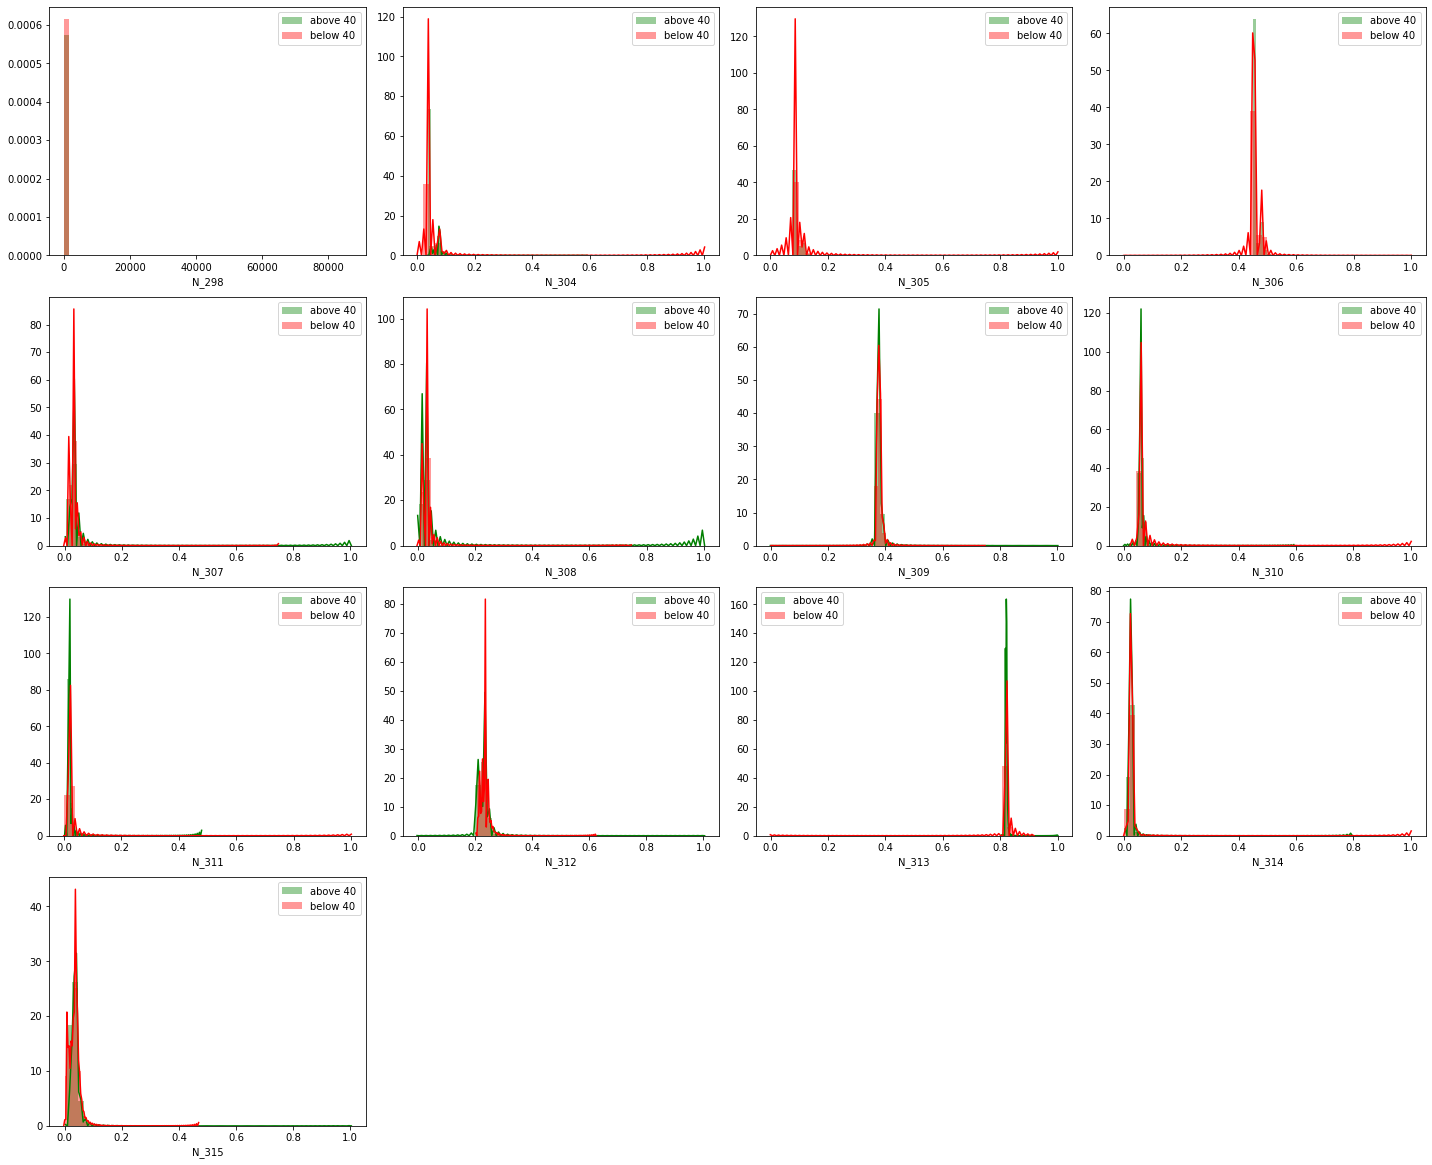

In [15]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in train_data.columns[295:315]:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(train_data[i][age_data>40], color='g', label = 'above 40')
    sns.distplot(train_data[i][age_data<40], color='r', label = 'below 40')
    plt.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

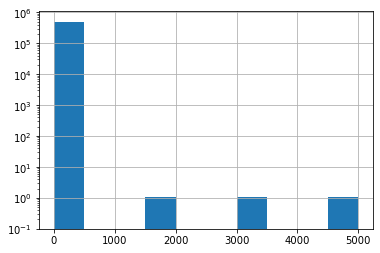

In [51]:
train_data['N_171'].hist(bottom=0.1, log=True)

# N_1, N_18, N_74, N_107, N_82, N_170, N_199
# N_32, N_89, N_98, 171

In [66]:
corr_matrix = train_data.corr()

In [67]:
corr_matrix['AGE'].sort_values(ascending=False)

AGE      1.000000
N_0      0.154288
N_188    0.113205
N_83     0.089639
N_259    0.085063
           ...   
N_157   -0.140099
N_52    -0.148242
N_223   -0.150809
N_28    -0.188980
N_245   -0.204660
Name: AGE, Length: 309, dtype: float64

In [58]:
train_data.head()

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,...,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE
0,3191,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.037098,0.036669,0.381190,0.061785,0.018134,0.230121,0.820451,0.023376,0.040398,32
1,70,1,0.0,0.0,0,0,0.0,0,0.0,0,...,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421,19
2,739,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.031708,0.032229,0.379370,0.060514,0.020345,0.234612,0.822041,0.026140,0.037473,20
3,102,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.033311,0.032229,0.378415,0.058257,0.019343,0.234612,0.821821,0.025022,0.026893,24
4,1096,0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.032810,0.032229,0.378915,0.060196,0.020345,0.234612,0.821909,0.025912,0.036423,53


1. AGE

In [ ]:
# N_1, N_18, N_74, N_107, N_82, N_170, N_199, categorical

In [ ]:
column_set = ColumnTransformer(
[('encoder', OneHotEncoder(),['N_1', 'N_18', 'N_82', 'N_170', 'N_199'])], remainder='passthrough') 
train_data = pd.DataFrame(column_set.fit_transform(train_data)) 
train_data = train_data.astype(np.float64)

In [14]:
aX = train_data.values
ay = age_data.values

In [15]:
#age data Split
aX_train, aX_val, ay_train, ay_val = train_test_split(aX, ay, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

aX_train = scaler.fit_transform(aX_train)
aX_val = scaler.transform(aX_val)

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(aX_train, ay_train)
print(lin_reg.score(aX_train, ay_train))
print(lin_reg.score(aX_val, ay_val))

0.17087206631525353
0.1654495439264635


In [17]:
preds = lin_reg.predict(aX_val)
mae = abs(ay_val - preds).mean()
print("mae: %f" % (mae))

mae: 10.154983


In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.3,
                max_depth = 5, alpha = 3, n_estimators = 30)
xg_reg.fit(aX_train,ay_train)

print(xg_reg.score(aX_train, ay_train))
print(xg_reg.score(aX_val, ay_val))

preds = xg_reg.predict(aX_val)
mae = abs(ay_val - preds).mean()
print("mae: %f" % (mae))

[01:11:34] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.26916877994500243
0.25239241542784274
mae: 9.535239


In [24]:
predictions = xg_reg.predict(aX_val)

for n in range(10):
  print(predictions[n], ay_val[n])

38.474197 28
36.19067 25
26.228977 19
37.057117 49
28.856052 34
42.205658 41
41.44807 57
45.716755 55
28.552309 26
38.258442 34


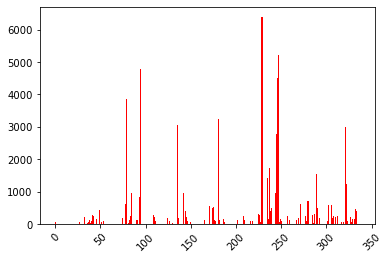

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression

kb = SelectKBest(score_func=f_regression, k=338)
kb.fit(train_data.loc[:, train_data.columns], age_data)
indices = np.argsort(kb.scores_)[::-1]


selected_features = []
for i in range(150):
  selected_features.append(train_data.columns[indices[i]])
plt.figure()
plt.bar(selected_features, kb.scores_[indices[range(150)]], color='r', align='center')
plt.xticks(rotation=45)

select_data = train_data.iloc[:, selected_features]